In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv


# Step 1: Load the Data and Learn About It
Load the data and explore basic information to understand the dataset's structure.

In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')

# Display the first few rows of the dataset
print(data.head())

# Get general information about the dataset
print(data.info())

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Check the class distribution
print("Class distribution:\n", data['Class'].value_counts(normalize=True))


   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

# Step 2: Exploratory Data Analysis (EDA)
Now, let’s conduct some EDA to gain insights into the data, focusing on class distribution, feature correlations, and distribution of Amount and Time.

2.1 Class Distribution
Visualizing the class distribution to confirm the presence of class imbalance.

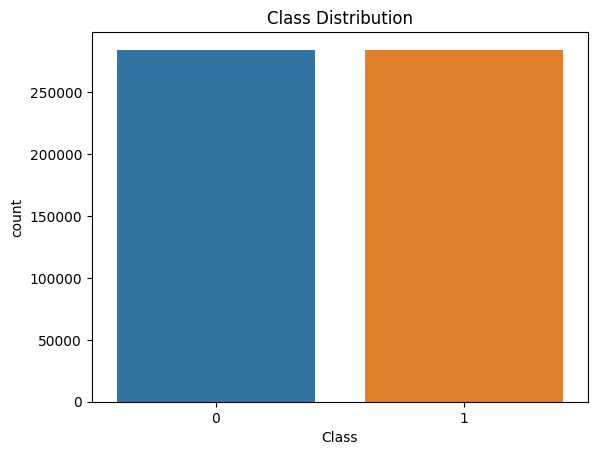

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize class distribution
sns.countplot(x='Class', data=data)
plt.title("Class Distribution")
plt.show()

In [7]:
print(data.describe())

                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486122  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std    1.000001e+00  1.000001e+00  1.00000

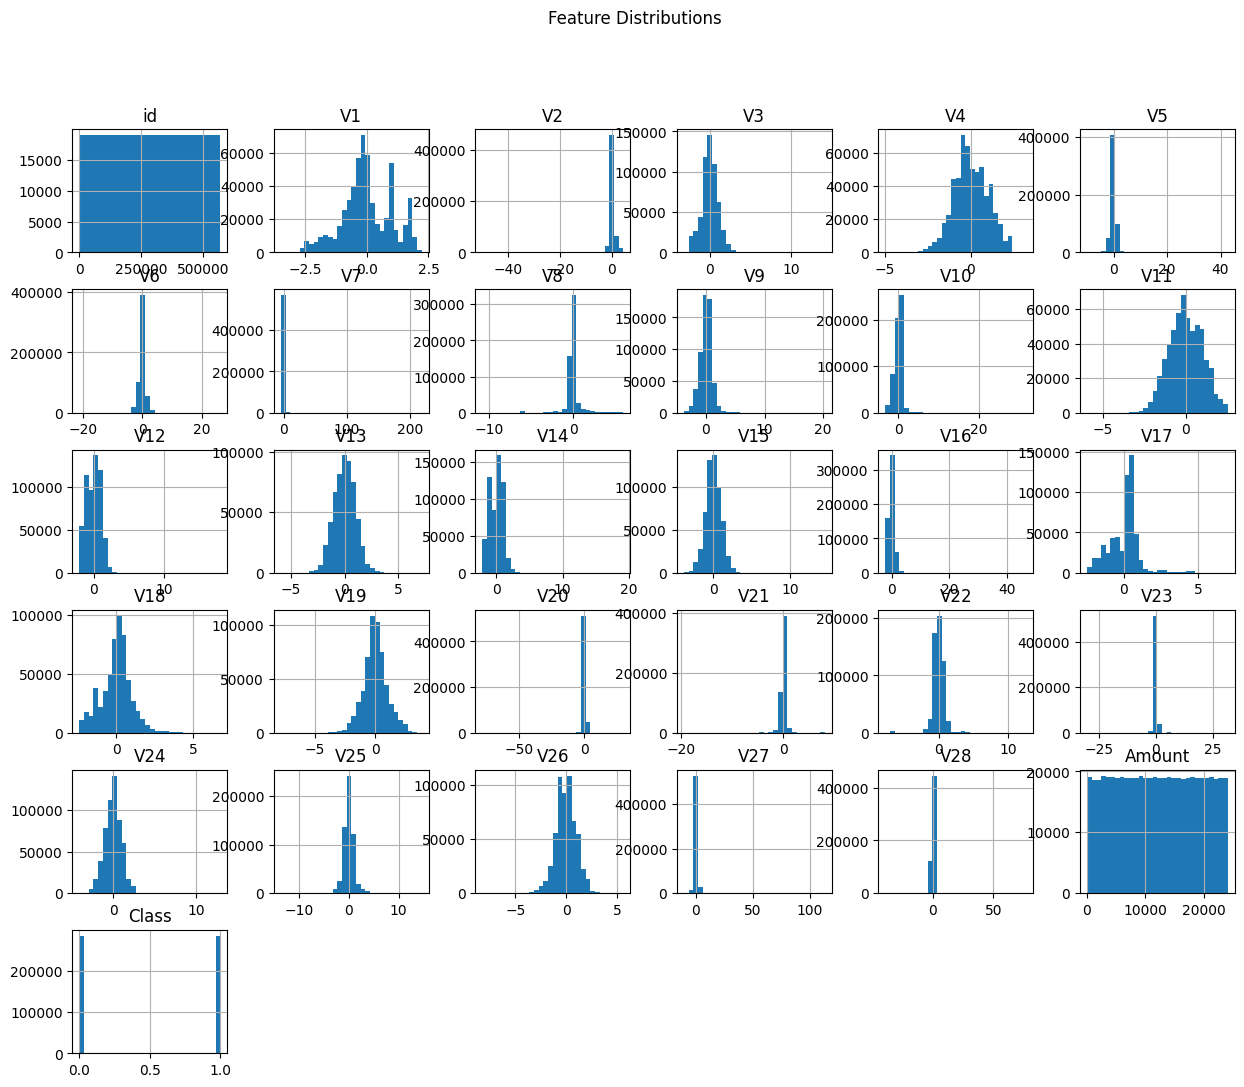

In [8]:
data.hist(figsize=(15, 12), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

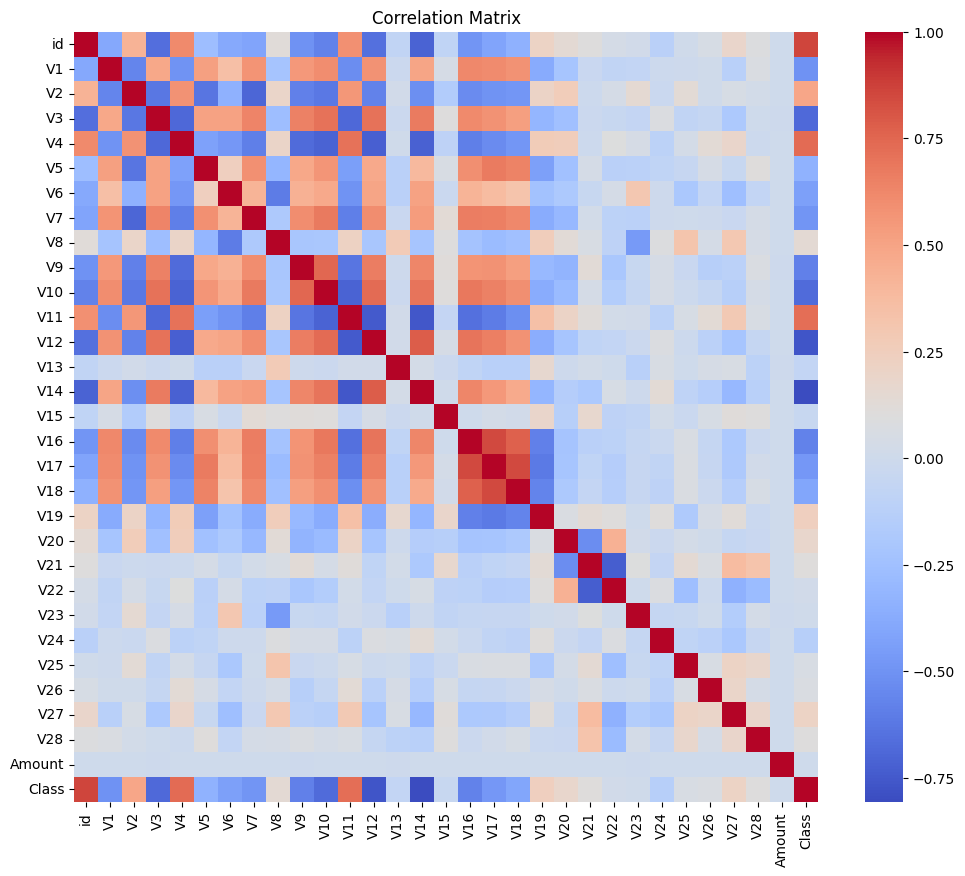

In [9]:
# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

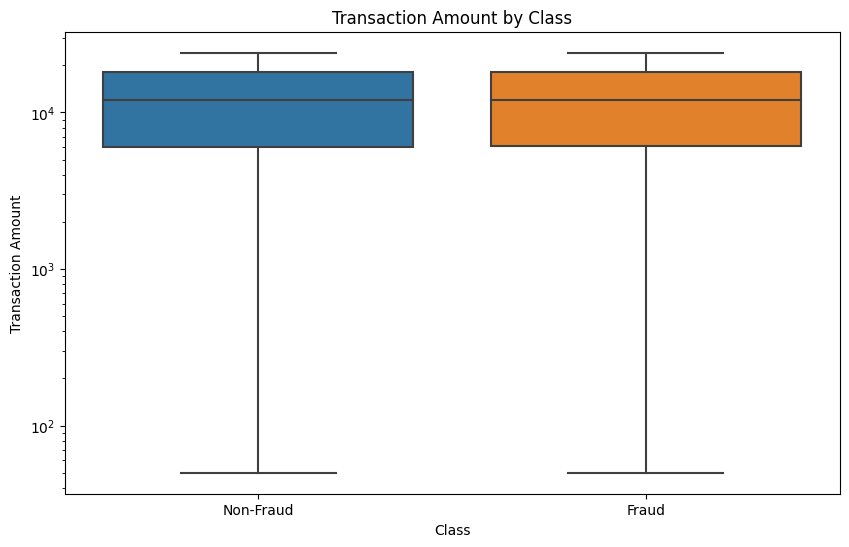

In [11]:
# Plot distribution of 'Amount' by class using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.yscale('log')  # Using a logarithmic scale to better visualize outliers
plt.title("Transaction Amount by Class")
plt.xlabel("Class")
plt.ylabel("Transaction Amount")
plt.xticks(ticks=[0, 1], labels=["Non-Fraud", "Fraud"])  # Setting class labels
plt.show()

# Step 3: Define and Train Models
After understanding the data and performing preprocessing (like scaling if needed), we can define and train our models.

3.1 Split Data and Scale Features
Since models like Logistic Regression and Neural Networks perform better with scaled data, use StandardScaler.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**3.2 Define the Models**

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{model.__class__.__name__} ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}\n")

# Logistic Regression
lr_model = LogisticRegression()
evaluate_model(lr_model, X_train_scaled, y_train, X_test_scaled, y_test)

# Decision Tree
dt_model = DecisionTreeClassifier()
evaluate_model(dt_model, X_train, y_train, X_test, y_test)

# Random Forest
rf_model = RandomForestClassifier()
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
evaluate_model(gb_model, X_train, y_train, X_test, y_test)

# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss')
evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

LogisticRegression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

LogisticRegression ROC AUC Score: 0.9998080191586667

DecisionTreeClassifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

DecisionTreeClassifier ROC AUC Score: 0.9995691398624765

RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.0

# 3.3 Performance Comparison of Classification Models

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define a function to store performance metrics for each model
def evaluate_model_performance(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    f1_score = report['weighted avg']['f1-score']
    return auc_score, f1_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

# Calculate ROC AUC and F1 scores
auc_scores = []
f1_scores = []
model_names = []

for name, model in models.items():
    auc, f1 = evaluate_model_performance(model, X_train_scaled, y_train, X_test_scaled, y_test)
    auc_scores.append(auc)
    f1_scores.append(f1)
    model_names.append(name)

# Plotting ROC AUC Scores
plt.figure(figsize=(10, 5))
plt.plot(model_names, auc_scores, marker='o', color='b', label="ROC AUC Score")
plt.xlabel("Model")
plt.ylabel("ROC AUC Score")
plt.title("Model ROC AUC Scores")
plt.legend()
plt.grid(True)
plt.show()

# Plotting F1 Scores
plt.figure(figsize=(10, 5))
plt.plot(model_names, f1_scores, marker='o', color='g', label="F1 Score")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.title("Model F1 Scores")
plt.legend()
plt.grid(True)
plt.show()